In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train.csv', dtype=str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: object(12)
memory usage: 83.7+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


In [10]:
df[['Age','Fare']] = df[['Age','Fare']].astype(float)
df[['Survived','SibSp','Parch']] = df[['Survived','SibSp','Parch']].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int32  
 7   Parch        891 non-null    int32  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(3), object(7)
memory usage: 73.2+ KB


In [12]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891.000000,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891,NaN,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,394,NaN,3,"Stewart, Mr. Albert A",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,1,NaN,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,0.383838,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,0.486592,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 결측 : age, cabin, Embarked
# 시각화를 통한 데이터 탐색

In [13]:
def bar_df(colname):
    global df
    surv = df[df['Survived']==1][colname].value_counts()
    dead = df[df['Survived']==0][colname].value_counts()
    tt = pd.DataFrame([surv,dead], index = ['Survived','dead'])
    return tt

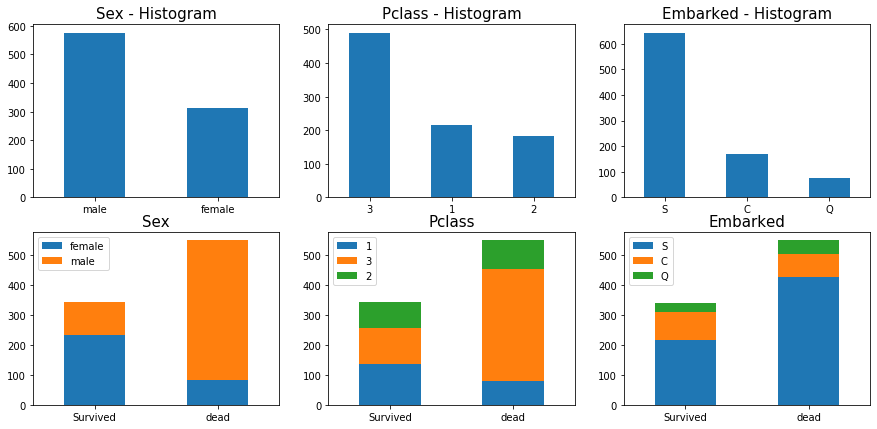

In [14]:
eda_cols = ['Sex', 'Pclass','Embarked']
fig = plt.figure(figsize=(15,7))

for i in range(len(eda_cols)):
    ax1 = plt.subplot(2,len(eda_cols),i+1) #위치에 대한 표현인듯
    df[eda_cols[i]].value_counts().plot(kind='bar',ax=ax1) #위에꺼 세개를 그림
    plt.title(eda_cols[i] + " - Histogram", fontsize=15) #표제를 씀
    plt.xticks(rotation=0) #x축 라벨 회전
    
    ax2 = plt.subplot(2,len(eda_cols),i+4)
    bar_df(eda_cols[i]).plot(kind='bar', stacked = True, ax=ax2)
    plt.title(eda_cols[i], fontsize=15)
    plt.xticks(rotation=0)
    
plt.show()

## 여기까지는 범주형 변수 sex/class/embarked에 대한 시각화

## > 아래부터는 연속형 (전체는 문자/범주/연속이 있다)

Text(0.5, 1.0, 'Age - Dead')

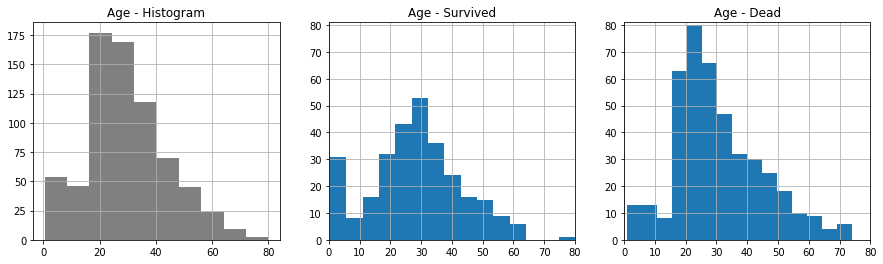

In [47]:
plt.figure(figsize=(15,4)) 
plt.subplot(131)
df['Age'].hist(bins=10, color='grey')
plt.title('Age - Histogram')

plt.subplot(132)
plt.axis([0,80,0,81])
df[df['Survived'] == 1]['Age'].hist(bins=15)
plt.title('Age - Survived')

plt.subplot(133)
plt.axis([0,80,0,81])
df[df['Survived'] == 0]['Age'].hist(bins=15)
plt.title('Age - Dead')

## x = 연령 y= 티켓요금 with 생존분포

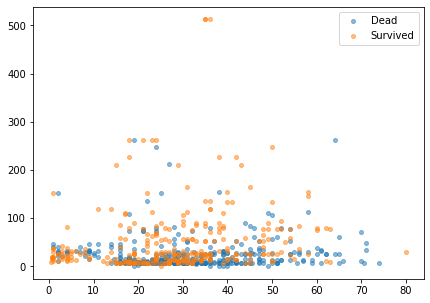

In [51]:
plt.figure(figsize=(7,5))
for i in range(len(['Dead','Survived'])):
    tt = df[df['Survived']==i]
    plt.plot(tt['Age'],tt['Fare'], ".", label=["Dead","Survived"][i], alpha=0.5, markersize=8)
plt.legend()
plt.show()

## x = (승선 항구, 티켓등급) y=승객 수

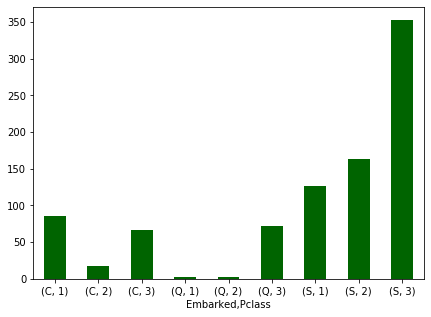

In [52]:
plt.figure(figsize=(7,5))
df.groupby(['Embarked','Pclass'])['PassengerId'].count().plot(kind='bar', color="darkgreen")
plt.xticks(rotation=0)
plt.show()

# 여기까지 EDA, 실험적데이터분석

# *****************************************

# 2. Feature engineering

In [59]:
train = pd.read_csv('train.csv', dtype = str)
test = pd.read_csv('test.csv', dtype = str)
print(train.info())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: object(12)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    object
 1   Pclass       418 non-null    object
 2   

In [218]:
train['Survived'] = train['Survived'].astype(int)
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [193]:
train['Name_fix'] = train['Name'].str.extract('( [A-Z]+\w*)', expand=False).str.strip() # 이게 뭐지!? strip으로 blank 처리
train['Name_fix']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name_fix, Length: 891, dtype: object

In [194]:
train['Name_fix'].value_counts() #Master까지만 유지하고 나머지는 다 others로 하자

Mr             503
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
Impe             3
Planke           3
Mlle             2
Gordon           2
Col              2
Castellana       2
Major            2
Capt             1
Ms               1
Walle            1
Velde            1
Billiard         1
Manent           1
Pelsmaeker       1
Melkebeke        1
Messemaeker      1
More             1
Cruyssen         1
Don              1
Carlo            1
Mulder           1
Countess         1
Shawah           1
Mme              1
Steen            1
Jonkheer         1
Name: Name_fix, dtype: int64

In [199]:
zz_name = ['Mr','Miss','Mrs','Master']
train['Name_fix'] = np.where(train['Name_fix'].isin(zz_name),train['Name_fix'],'Others') # np where에 대한 사용

In [205]:
train.Name_fix.value_counts()

Mr        503
Miss      179
Mrs       121
Others     48
Master     40
Name: Name_fix, dtype: int64

In [223]:
train.groupby(['Name_fix']).Survived.mean()

Name_fix
Master    0.575000
Miss      0.703911
Mr        0.157058
Mrs       0.801653
Others    0.354167
Name: Survived, dtype: float64

<Figure size 504x432 with 0 Axes>

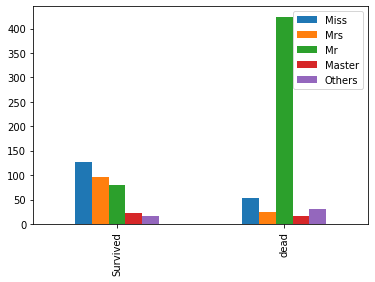

In [233]:
def bar_df(df,colname):
    surv = df[df['Survived']==1][colname].value_counts()
    dead = df[df['Survived']==0][colname].value_counts()
    tt = pd.DataFrame([surv,dead], index=['Survived','dead'])
    return tt

plt.figure(figsize=(7,6))
bar_df(train,'Name_fix').plot(kind='bar')
plt.show()

In [234]:
test['Name_fix'] = test['Name'].str.extract('( [A-Z]+\w*)', expand=False).str.strip()
test['Name_fix'] = np.where(test['Name_fix'].isin(['Mr','Miss','Mrs','Master']), test['Name_fix'], 'Others')